## 1. Importing Libraries & Files

In [6]:
# Importing Libraries

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns                               
import locale


In [7]:
# Open JSON and save exchange data into variables

with open('data.json') as f:
    data = json.load(f)

    
btcturk_data = data[0]['btcturk']
binance_data = data[1]['binance']
paribu_data = data[2]['Paribu']

## 2. Creting Variables & Cleaning Data

In [11]:
# Binance data cleaning

binance_24h_volume = str(int(float(binance_data['binance_volume'][0].replace('$', '').replace(',', ''))))
binance_24h_volume_in_btc = binance_data['binance_volume_in_btc'][0].replace(',', '')
#binance_7d_volume = binance_data['7d_volume'].replace('$', '').replace(',', '')
binance_total_cryptocurrencies = binance_data['binance_total_cryptocurrencies'][0]
#binance_mounthly_traffic = binance_data['mo_organic_traffic'].replace(',', '')
#binance_ahref_ranking = binance_data['ahref_ranking'].replace(',', '')
binance_markets_no = binance_data['binance_markets'][0]
binance_market_dominance = binance_data['binance_market_dominance'][0].replace('%', '')
binance_rank = binance_data['binance_market_rank'][0].replace('#', '')
binance_markets = binance_data['markets']
binance_market_base_coins = [' '.join(market['Base Coin']) if isinstance(market['Base Coin'], list) else market['Base Coin'] for market in binance_markets]
binance_market_names = [' '.join(market['Name']) if isinstance(market['Name'], list) else market['Name'] for market in binance_markets]
binance_market_volumes = [' '.join(market['Volume']) if isinstance(market['Volume'], list) else market['Volume'].replace('$', '').replace(',', '') for market in binance_markets]
binance_market_volumes_percentage = [' '.join(market['Volume %']).replace('%', '') if isinstance(market['Volume %'], list) else market['Volume %'].replace('%', '')for market in binance_markets]

In [12]:
# BtcTurk data cleaning

btcturk_24h_volume = str(int(float(btcturk_data['btcturk_volume'][0].replace('$', '').replace(',', ''))))
btcturk_24h_volume_in_btc = btcturk_data['btcturk_volume_in_btc'][0].replace(',', '')
#btcturk_7d_volume = btcturk_data['7d_volume'].replace('$', '').replace(',', '')
btcturk_total_cryptocurrencies = btcturk_data['btcturk_total_cryptocurrencies'][0]
#btcturk_mounthly_traffic = btcturk_data['mo_organic_traffic'].replace(',', '')
#btcturk_ahref_ranking = btcturk_data['ahref_ranking'].replace(',', '')
btcturk_markets_no = btcturk_data['btcturk_markets_raw'][0]
btcturk_market_dominance = btcturk_data['btcturk_market_dominance'][0].replace('%', '')
btcturk_rank = btcturk_data['btcturk_market_rank'][0].replace('#', '')
btcturk_markets = btcturk_data['markets']
btcturk_market_base_coins = [' '.join(market['Base Coin']) if isinstance(market['Base Coin'], list) else market['Base Coin'] for market in btcturk_markets]
btcturk_market_names = [' '.join(market['Name']) if isinstance(market['Name'], list) else market['Name'] for market in btcturk_markets]
btcturk_market_volumes = [' '.join(market['Volume']) if isinstance(market['Volume'], list) else market['Volume'].replace('$', '').replace(',', '') for market in btcturk_markets]
btcturk_market_volumes_percentage = [' '.join(market['Volume %']).replace('%', '') if isinstance(market['Volume %'], list) else market['Volume %'].replace('%', '')for market in btcturk_markets]

In [13]:
# Paribu data cleaning

paribu_24h_volume = str(int(float(paribu_data['paribu_volume'][0].replace('$', '').replace(',', ''))))
paribu_24h_volume_in_btc = paribu_data['paribu_volume_in_btc'][0].replace(',', '')
#paribu_7d_volume = paribu_data['7d_volume'].replace('$', '').replace(',', '')
paribu_total_cryptocurrencies = paribu_data['paribu_total_cryptocurrencies'][0]
#paribu_mounthly_traffic = paribu_data['mo_organic_traffic'].replace(',', '')
#paribu_ahref_ranking = paribu_data['ahref_ranking'].replace(',', '')
paribu_markets_no = paribu_data['paribu_markets'][0]
paribu_market_dominance = paribu_data['paribu_market_dominance'][0].replace('%', '')
paribu_rank = paribu_data['paribu_market_rank'][0].replace('#', '')
paribu_markets = paribu_data['markets']
paribu_market_base_coins = [' '.join(market['Base Coin']) if isinstance(market['Base Coin'], list) else market['Base Coin'] for market in paribu_markets]
paribu_market_names = [' '.join(market['Name']) if isinstance(market['Name'], list) else market['Name'] for market in paribu_markets]
paribu_market_volumes = [' '.join(market['Volume']) if isinstance(market['Volume'], list) else market['Volume'].replace('$', '').replace(',', '') for market in paribu_markets]
paribu_market_volumes_percentage = [' '.join(market['Volume %']).replace('%', '') if isinstance(market['Volume %'], list) else market['Volume %'].replace('%', '')for market in paribu_markets]

In [14]:
# Caculate Total Value in each Exchange

binance_total_maerket_volume = 0
for i in binance_market_volumes:
    n = int(i)
    binance_total_maerket_volume += n
    
btcturk_total_maerket_volume = 0
for i in btcturk_market_volumes:
    n = int(i)
    btcturk_total_maerket_volume += n
    
paribu_total_maerket_volume = 0
for i in paribu_market_volumes:
    n = int(i)
    paribu_total_maerket_volume += n

## 3. Creating DataFrames

In [17]:
exchanges = ['Binance', 'BtcTurk', 'Paribu']
volumes_24h = [binance_24h_volume, btcturk_24h_volume, paribu_24h_volume]
volumes_24h_btc = [binance_24h_volume_in_btc, btcturk_24h_volume_in_btc, paribu_24h_volume_in_btc]
#volumes_7d = [binance_7d_volume, btcturk_7d_volume, paribu_7d_volume]
total_cryptocurrencies = [binance_total_cryptocurrencies, btcturk_total_cryptocurrencies, paribu_total_cryptocurrencies]
#mounthly_website_traffics = [binance_mounthly_traffic, btcturk_mounthly_traffic, paribu_mounthly_traffic]
#ahref_rankings = [binance_ahref_ranking, btcturk_ahref_ranking, paribu_ahref_ranking]
number_of_markets = [binance_markets_no, btcturk_markets_no, paribu_markets_no]
dominances = [binance_market_dominance, btcturk_market_dominance, paribu_market_dominance]
ranks = [binance_rank, btcturk_rank, paribu_rank]


df_exchange_data = pd.DataFrame({
    'Exchange': exchanges,
    '24H Volume($)': volumes_24h,
    '24H Volume(BTC)': volumes_24h_btc,
    #'7D Volume($)': volumes_7d,
    'Total Cryptocurrencies': total_cryptocurrencies,
    'Number of Markets': number_of_markets,
    'Exchange Rank': ranks, 
    'Exchange Dominance among all Exchanges': dominances,
    #'Mounthly Website Traffic': mounthly_website_traffics,
    #'Ahref Ranking': ahref_rankings,
})

In [18]:
df_exchange_data.head()

,Exchange,24H Volume($),24H Volume(BTC),Total Cryptocurrencies,Number of Markets,Exchange Rank,Exchange Dominance among all Exchanges
0,Binance,755699618,10803,178,201,21,0.35
1,BtcTurk,573483532,8198,108,208,89,0.27
2,Paribu,323027946,4618,145,152,121,0.15


In [19]:
df_exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Exchange                                3 non-null      object
 1   24H Volume($)                           3 non-null      object
 2   24H Volume(BTC)                         3 non-null      object
 3   Total Cryptocurrencies                  3 non-null      object
 4   Number of Markets                       3 non-null      object
 5   Exchange Rank                           3 non-null      object
 6   Exchange Dominance among all Exchanges  3 non-null      object
dtypes: object(7)
memory usage: 296.0+ bytes


In [20]:
df_exchange_data['Exchange'] = df_exchange_data['Exchange'].astype('category')
df_exchange_data['24H Volume($)'] = df_exchange_data['24H Volume($)'].astype('int')
df_exchange_data['24H Volume(BTC)'] = df_exchange_data['24H Volume(BTC)'].astype('int')
#df_exchange_data['7D Volume($)'] = df_exchange_data['7D Volume($)'].astype('int')
df_exchange_data['Total Cryptocurrencies'] = df_exchange_data['Total Cryptocurrencies'].astype('int')
df_exchange_data['Number of Markets'] = df_exchange_data['Number of Markets'].astype('int')
df_exchange_data['Exchange Rank'] = df_exchange_data['Exchange Rank'].astype('int')
df_exchange_data['Exchange Dominance among all Exchanges'] = df_exchange_data['Exchange Dominance among all Exchanges'].astype('float')
#df_exchange_data['Mounthly Website Traffic'] = df_exchange_data['Mounthly Website Traffic'].astype('int')
#df_exchange_data['Ahref Ranking'] = df_exchange_data['Ahref Ranking'].astype('int')

df_exchange_data['24H Volume($)'] = df_exchange_data['24H Volume($)'] / 1e6
#df_exchange_data['7D Volume($)'] = df_exchange_data['7D Volume($)'] / 1e9

In [21]:
df_exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Exchange                                3 non-null      category
 1   24H Volume($)                           3 non-null      float64 
 2   24H Volume(BTC)                         3 non-null      int64   
 3   Total Cryptocurrencies                  3 non-null      int64   
 4   Number of Markets                       3 non-null      int64   
 5   Exchange Rank                           3 non-null      int64   
 6   Exchange Dominance among all Exchanges  3 non-null      float64 
dtypes: category(1), float64(2), int64(4)
memory usage: 407.0 bytes


## 4. Visualizing

/Users/peymankhodabandehlouei/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


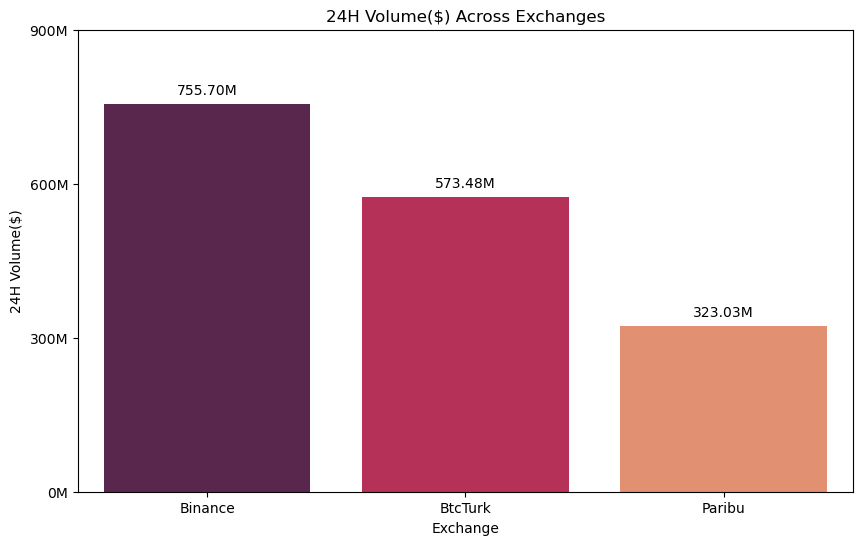

In [22]:
df_exchange_data = df_exchange_data.sort_values(by='24H Volume($)', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Exchange', y='24H Volume($)', data=df_exchange_data, palette='rocket', order=df_exchange_data['Exchange'])

# Customize y-axis ticks to represent specific values in millions
ax.set_yticks([0, 300, 600, 900])

# Customize y-axis labels to represent values in millions
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}M'))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('24H Volume($) Across Exchanges')
plt.xlabel('Exchange')
plt.ylabel('24H Volume($)')
plt.show()


/Users/peymankhodabandehlouei/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


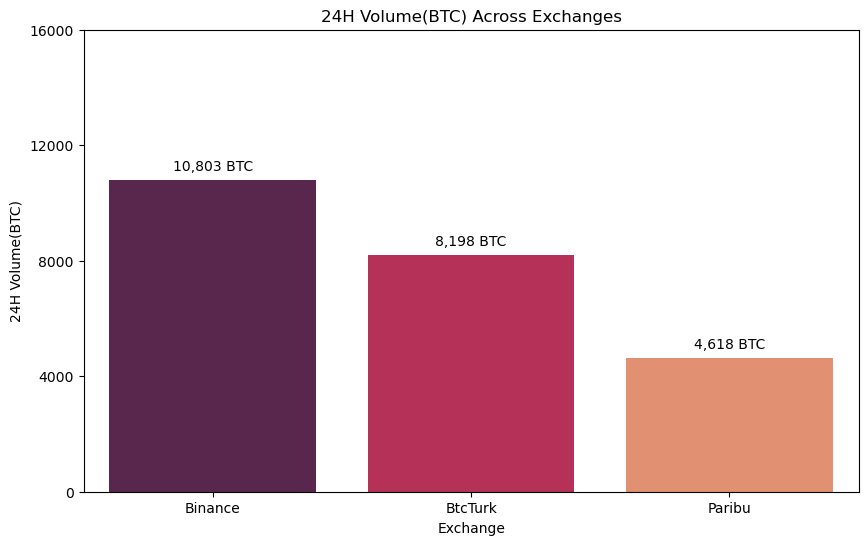

In [24]:
df_exchange_data = df_exchange_data.sort_values(by='24H Volume(BTC)', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Exchange', y='24H Volume(BTC)', data=df_exchange_data, palette='rocket', order=df_exchange_data['Exchange'])

# Customize y-axis ticks to represent specific values
ax.set_yticks([0, 4000, 8000, 12000, 16000])

# Annotate each bar with its value formatted with commas and append "BTC"
for p in ax.patches:
    height = p.get_height()
    formatted_value = '{:,.0f}'.format(height)  # Add commas as thousands separators
    ax.annotate(f'{formatted_value} BTC', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('24H Volume(BTC) Across Exchanges')
plt.xlabel('Exchange')
plt.ylabel('24H Volume(BTC)')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


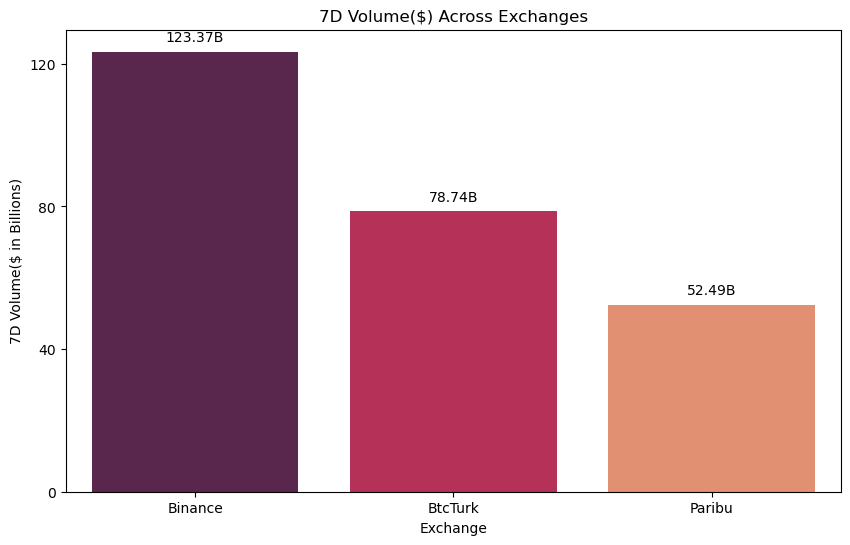

In [216]:
df_exchange_data = df_exchange_data.sort_values(by='7D Volume($)', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Exchange', y='7D Volume($)', data=df_exchange_data, palette='rocket', order=df_exchange_data['Exchange'])

# Customize y-axis ticks to represent specific values in millions
ax.set_yticks([0, 40, 80, 120])

# Customize y-axis labels to represent values in millions
#ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}B'))

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}B', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('7D Volume($) Across Exchanges')
plt.xlabel('Exchange')
plt.ylabel('7D Volume($ in Billions)')
plt.show()
